# Clustering jerárquico y dendrogramas

Se debe tener en cuenta que:
* $Z$ Es el array que contiene información sobre las uniones
* $k$ Es el número de clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

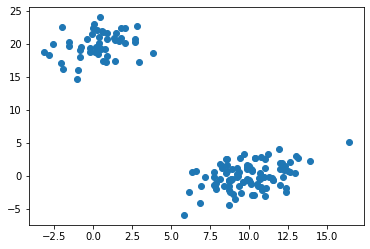

In [2]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = (100,))
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = (50,))
X = np.concatenate((a,b))
plt.scatter(X[:,0], X[:,1])

In [3]:
Z = linkage(X, "ward")

In [4]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

In [5]:
Z[0] # Los puntos 52 y 53 son los más cercanos

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

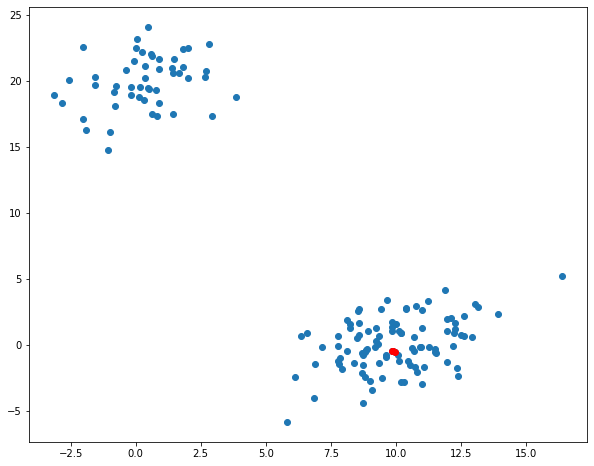

In [6]:
idx = [33, 62, 68]
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx,0], X[idx,1], color = "red")
plt.show()

## Representación del dendrograma

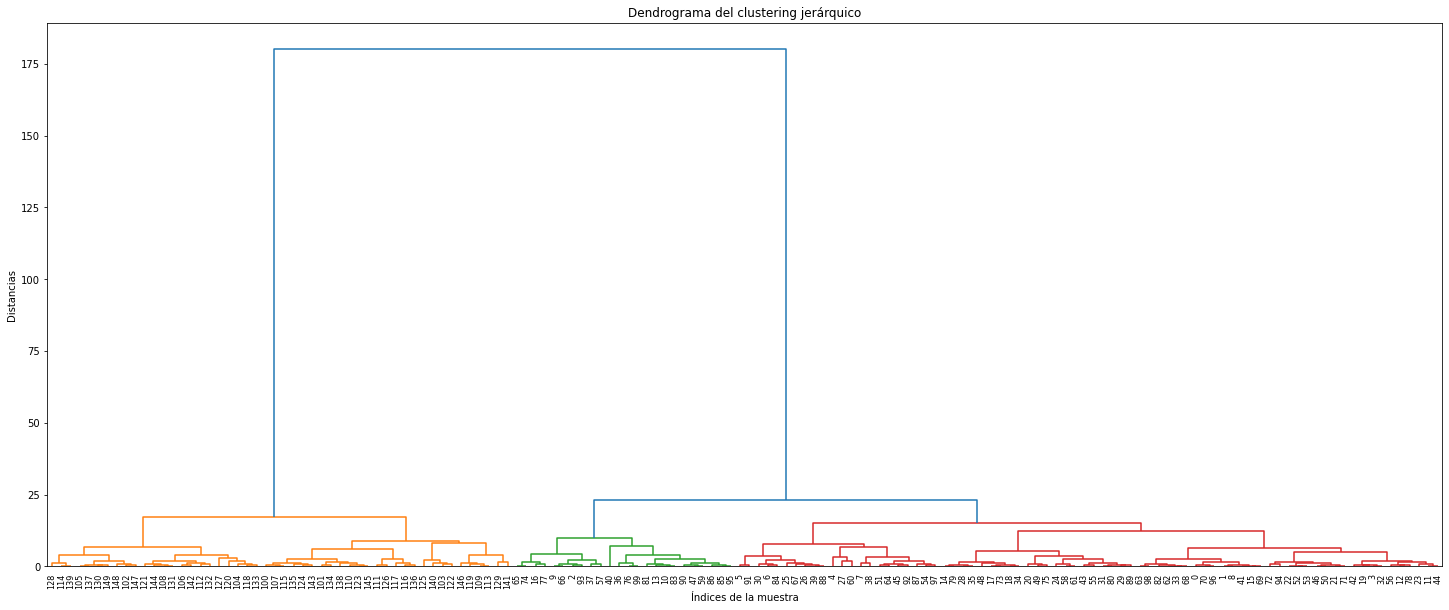

In [7]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size=8.0, color_threshold = 0.1*180)
plt.show()

In [8]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

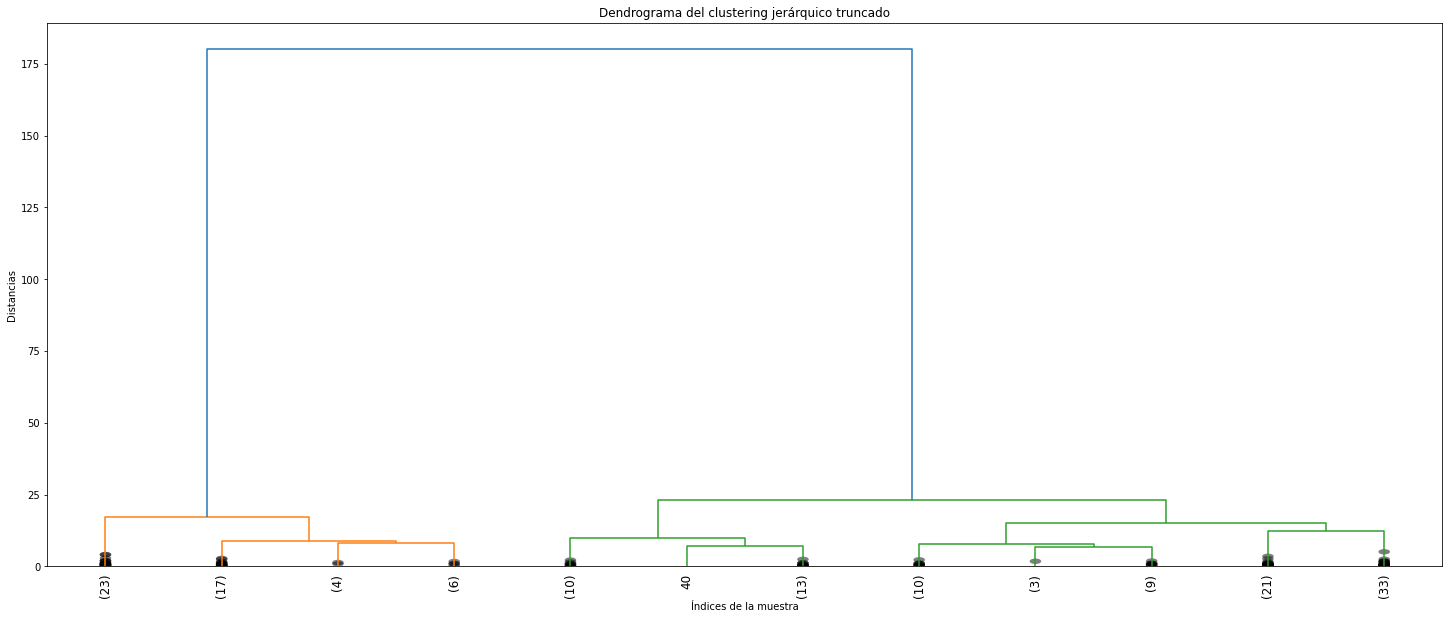

In [9]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size=12.0, color_threshold = 0.7*180,
           truncate_mode = "lastp", p = 12, show_leaf_counts = True, show_contracted=True)
plt.show()

### Dendrograma tuneado

In [10]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con dendrograma truncado")
        plt.xlabel("Índice del dataset (tamaño cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c = c)
                plt.annotate('%.3g'%y, (x,y), xytext = (0,-5),
                            textcoords = "offset points", va = "top", ha = "center")
    if max_d:
        plt.axhline(y = max_d, c = 'k')
            
    return ddata

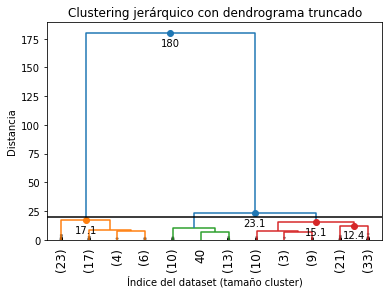

In [13]:
dendrogram_tune(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90, leaf_font_size = 12,
                show_contracted = True, annotate_above = 10, max_d = 20)
plt.show()

### Corte automático del dendrograma

$$ \text{incs}_i = \frac{h_i-\bar{h}}{\sigma_h}$$

In [14]:
from scipy.cluster.hierarchy import inconsistent

In [22]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo

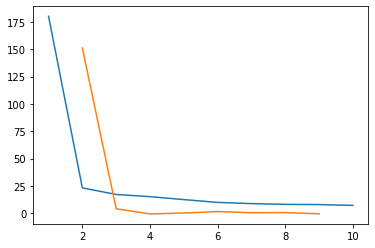

Número máximo de clusters: 2


In [36]:
last = Z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1, len(last) + 1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2] + 1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("Número máximo de clusters: {k:.0f}".format(k = k))

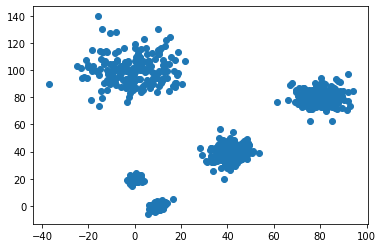

In [40]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size = [200,])

X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [41]:
Z2 = linkage(X2, "ward")

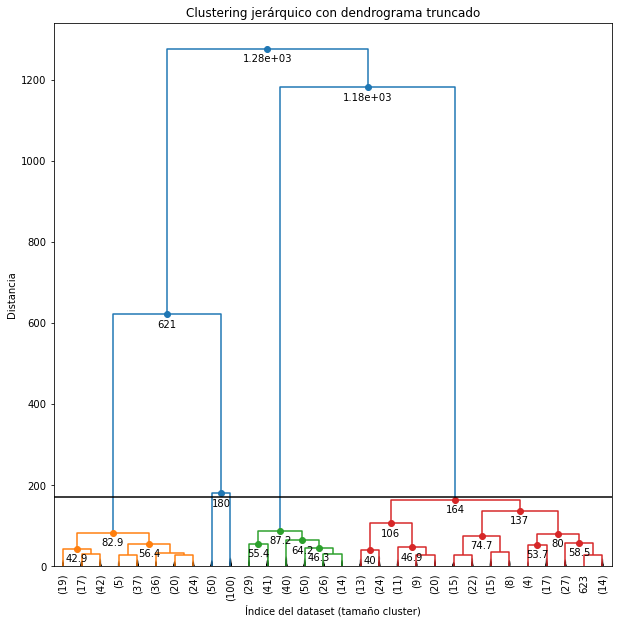

In [42]:
plt.figure(figsize = (10,10))
dendrogram_tune(Z2, truncate_mode = "lastp", p = 30, leaf_rotation = 90.,
               leaf_font_size = 10., show_contracted = True, annotate_above = 40,
               max_d = 170)
plt.show()

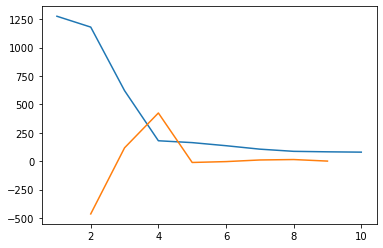

Número máximo de clusters: 4


In [43]:
last = Z2[-10:,2]
last_rev = last[::-1]
idx = np.arange(1, len(last) + 1)
plt.plot(idx, last_rev)

acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2] + 1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("Número máximo de clusters: {k:.0f}".format(k = k))

In [44]:
print(inconsistent(Z2, 5)[-10:])

[[ 17.10886725  19.78424778  24.           3.18082457]
 [ 17.95246164  17.75158764  29.           3.6603638 ]
 [ 19.84568014  19.75422863  30.           3.40728901]
 [ 15.93335454  20.66307671  29.           4.3760082 ]
 [ 26.37319213  29.20863918  29.           3.77694951]
 [ 37.85456279  38.17679793  31.           3.30106963]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.26014634 112.42515554  31.           5.14139753]
 [ 82.67247407 207.06626385  31.           5.30113978]
 [148.34422355 309.03532312  31.           3.64873006]]


## Recuperar los clusters y sus elementos

In [45]:
from scipy.cluster.hierarchy import fcluster

In [47]:
max_d = 20
clusters = fcluster(Z, max_d, criterion = "distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [48]:
k = 3
clusters = fcluster(Z, k, criterion = "maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
clusters = fcluster(Z, 8, depth = 10)

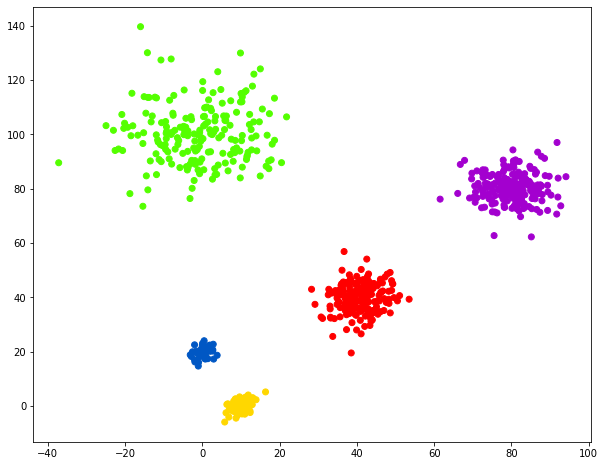

In [56]:
max_d = 180
clusters = fcluster(Z2, max_d, criterion = "distance")
clusters

plt.figure(figsize = (10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap = "prism")
plt.show()